<h1 class="">Data Analysis</h1>
<h5 class="">Richter's Predictor: Modeling Earthquake Damage</h5>
<h5 class="">Competition hosted by <a href="https://www.drivendata.org/competitions/57/nepal-earthquake/page/134/">Driven Data</a></h5>
<h5 class=""><a href="https://github.com/hss0727/driven_data_richters_predictor/blob/main/model.ipynb">Github Repo for code</a></h5>

<br>
<br>
<h3>Baseline Prediction using Random Forest</h3>
<hr>


In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [40]:
# Read data
train_df = pd.read_csv("./data/merged_train_data.csv")

In [41]:
train_df = pd.get_dummies(train_df)

In [42]:
# Train-test split on data

y = train_df['damage_grade']
X = train_df.drop(['building_id', 'damage_grade'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [45]:
# Train model
pipe = make_pipeline(StandardScaler(), RandomForestClassifier())

param = {
        'randomforestclassifier__n_estimators' : [50, 100, 150],
        'randomforestclassifier__max_features' : ['sqrt', 'log2']
    }

gs = GridSearchCV(pipe, param_grid=param, cv=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__max_features': ['sqrt',
                                                                  'log2'],
                         'randomforestclassifier__n_estimators': [50, 100,
                                                                  150]})

In [46]:
gs.best_params_

{'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__n_estimators': 150}

In [48]:
# Run Random Forest
rf = RandomForestClassifier(n_estimators=150, max_features='sqrt')
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

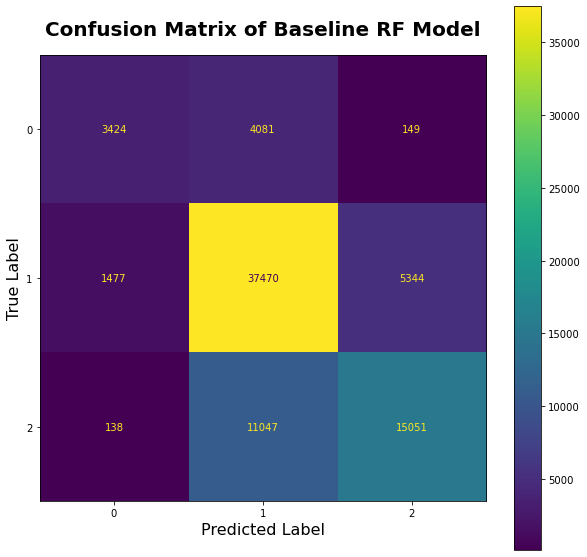

In [155]:
fig, ax = plt.subplots(figsize=(10,10))

rf_confusion_matrix = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(rf_confusion_matrix)
plt.title("Confusion Matrix of Baseline RF Model", fontsize=20, fontweight='bold', y=1.03)
disp.plot(ax=ax)
plt.xlabel('Predicted Label', fontsize=16)
plt.ylabel('True Label', fontsize=16)
plt.savefig("./figs/confusion_matrix.png")
plt.show()

In [73]:
f1_score(y_test, pred, average='micro')

0.7155830700553844

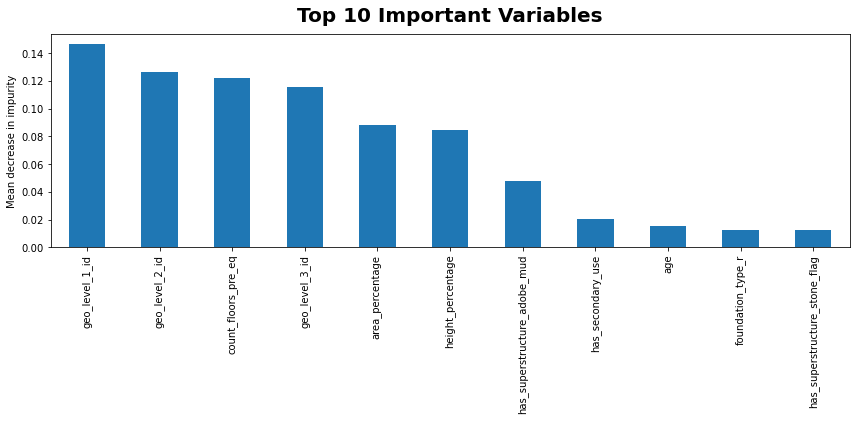

In [157]:
importances = rf.feature_importances_

feature_names = train_df.drop(['Unnamed: 0', 'building_id'], axis=1).columns

forest_importances = pd.Series(importances, index=feature_names)
forest_importances.sort_values(ascending=False, inplace=True)
figure = forest_importances[0:11].plot.bar(figsize=(12,6))
figure.set_title("Top 10 Important Variables", fontsize=20, fontweight='bold', y=1.03)
figure.set_ylabel("Mean decrease in impurity")
plt.tight_layout()
plt.savefig("./figs/feature_importance.png")
plt.show()